<a href="https://colab.research.google.com/github/Ujanghost/Multiple-Regression/blob/main/LR_CIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white


In [22]:
# Load the dataset
data = pd.read_csv("CompleteDataset.csv")


<ipython-input-22-13560d5d2e8b>:2: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("CompleteDataset.csv")


In [45]:
target = data['Overall']
predictors = data[['Age', 'Potential', 'Value', 'Wage']]

In [50]:
# Convert Value column to string and then to numeric
predictors['Value'] = predictors['Value'].astype(str).str.replace('€', '').str.replace('M', '').str.replace('K', '').astype(float)
predictors['Value'] = predictors['Value'].where(~predictors['Value'].isna(), predictors['Value'].astype(str).str.replace('K', '').astype(float) / 1000)

In [51]:
# Convert Wage column to numeric
predictors['Wage'] = predictors['Wage'].str.replace('€', '').str.replace('K', '').astype(float) / 1000

In [52]:
# Handle missing values in predictors
predictors = predictors.fillna(0)


In [53]:
# Add a constant term for the intercept
predictors = sm.add_constant(predictors)

In [54]:
# Fit the multiple regression model
model = sm.OLS(target, predictors).fit()

In [55]:
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 2.857e+04
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        13:30:10   Log-Likelihood:                -42529.
No. Observations:               17981   AIC:                         8.507e+04
Df Residuals:                   17976   BIC:                         8.511e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.3924      0.336    -57.710      0.0

In [56]:
# Check for multicollinearity
print("Variance Inflation Factors (VIF):")
print(1 / (1 - model.rsquared))


Variance Inflation Factors (VIF):
7.357854078957994


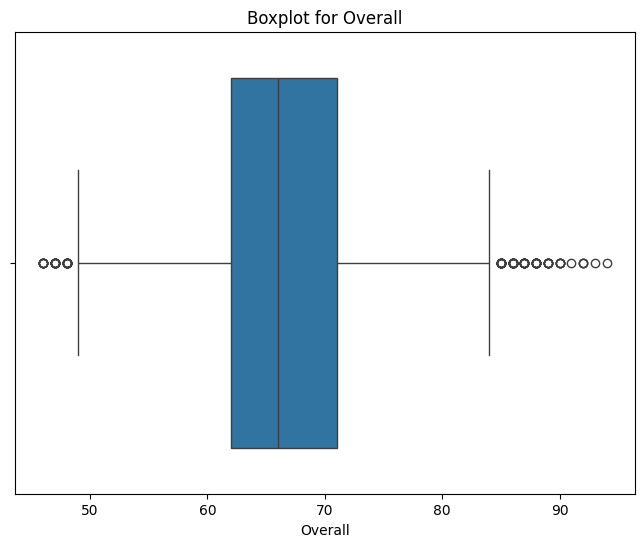

In [57]:
# Create a boxplot for the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Overall')
plt.title('Boxplot for Overall')
plt.show()

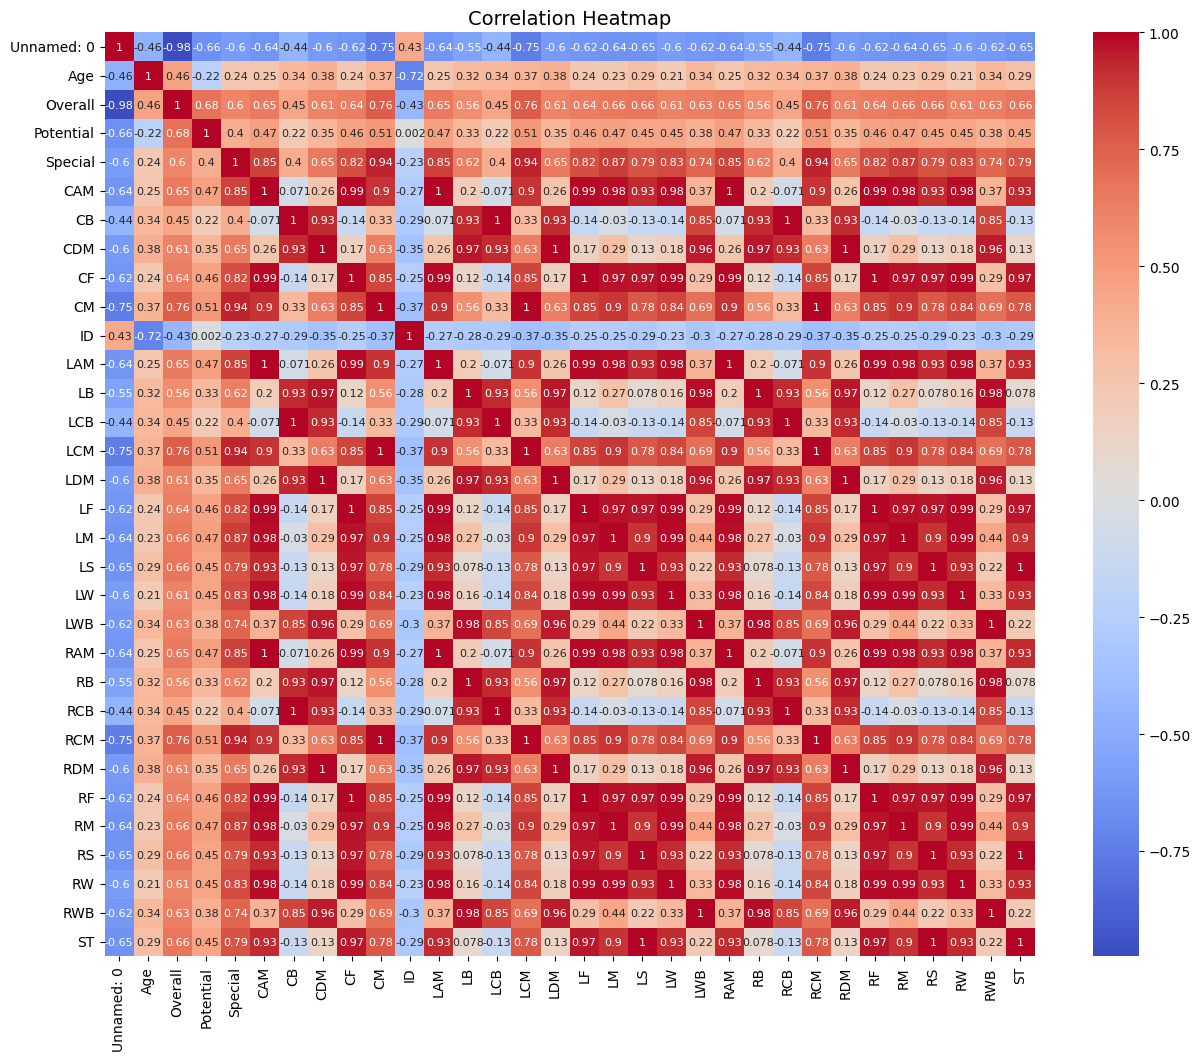

In [65]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(15, 12))  # Increase the figure size
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', annot_kws={"fontsize": 8})  # Adjust font size
plt.title('Correlation Heatmap', fontsize=14)  # Adjust title font size
plt.show()

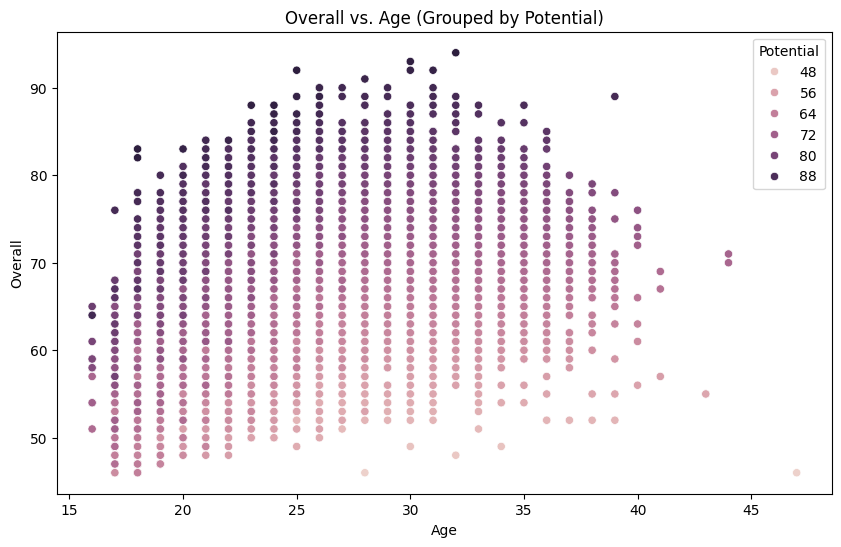

In [59]:
# Create a group plot for Overall vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Overall', hue='Potential')
plt.title('Overall vs. Age (Grouped by Potential)')
plt.show()

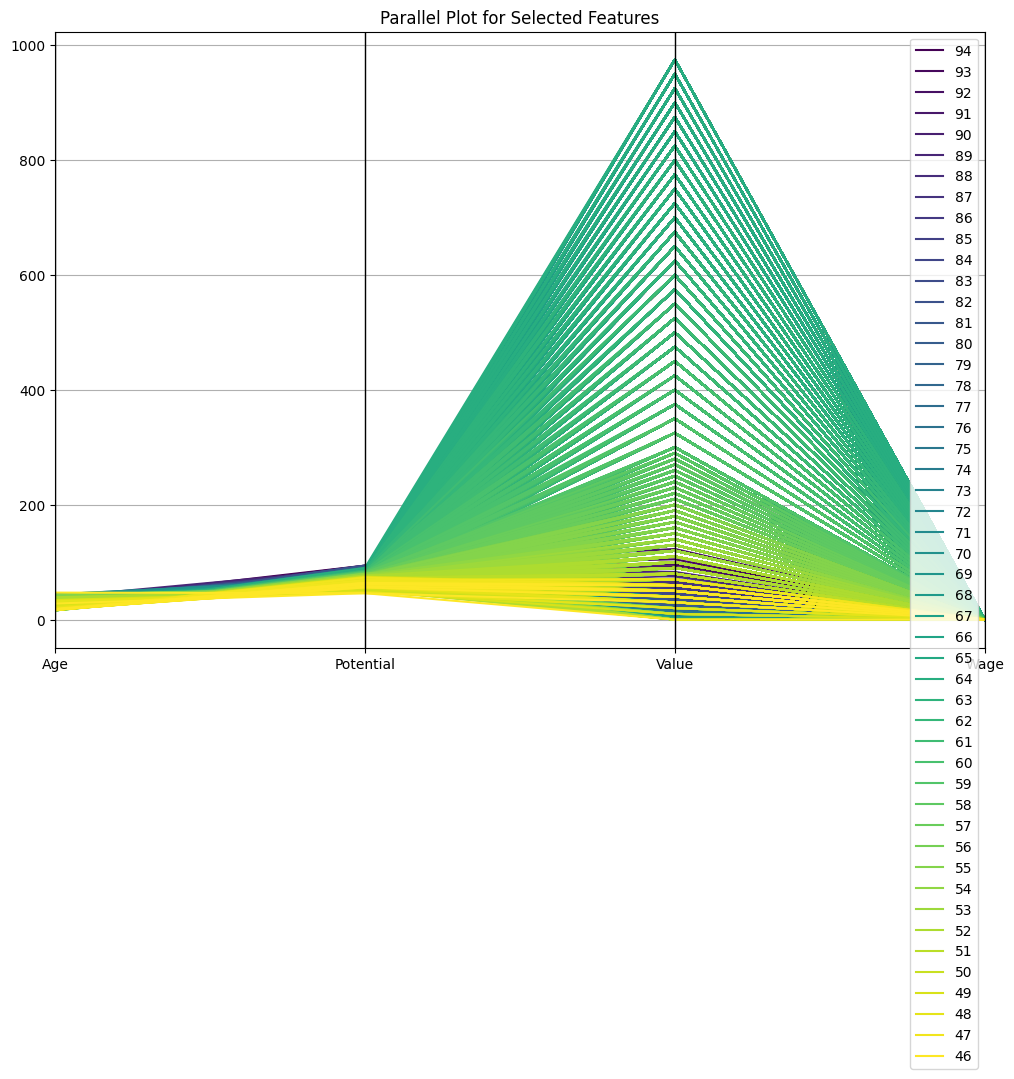

In [64]:
# Create a parallel plot for selected features
selected_cols = ['Overall', 'Age', 'Potential', 'Value', 'Wage']
parallel_data = data[selected_cols].copy()  # Create a copy to avoid modifying the original data

# Convert non-numeric columns to numeric
parallel_data['Value'] = parallel_data['Value'].astype(str).str.replace('€', '').str.replace('M', '').str.replace('K', '').astype(float)
parallel_data['Value'] = parallel_data['Value'].where(~parallel_data['Value'].isna(), parallel_data['Value'].astype(str).str.replace('K', '').astype(float) / 1000)
parallel_data['Wage'] = parallel_data['Wage'].str.replace('€', '').str.replace('K', '').astype(float) / 1000

plt.figure(figsize=(12, 8))
plt.title('Parallel Plot for Selected Features')
pd.plotting.parallel_coordinates(parallel_data, 'Overall', colormap='viridis')
plt.show()

In [68]:
# Check for heteroscedasticity
print("\nBreusch-Pagan test for heteroscedasticity:")
_, bp_pvalue, _, _ = het_breuschpagan(model.resid, model.model.exog)
print(f"p-value: {bp_pvalue:.4f}")

print("\nWhite's test for heteroscedasticity:")
_, white_pvalue, _, _ = het_white(model.resid, model.model.exog)
print(f"p-value: {white_pvalue:.4f}")



Breusch-Pagan test for heteroscedasticity:
p-value: 0.0000

White's test for heteroscedasticity:
p-value: 0.0000
